## Using statsmodels lowess

Copyright 2019 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [77]:
%matplotlib inline

import numpy as np
import pandas as pd

import random

import matplotlib.pyplot as plt

[This article](https://medium.economist.com/mistakes-weve-drawn-a-few-8cdd8a42d368) suggests that a smooth curve is a better way to show noisy polling data over time.

Here's their before and after:

![](https://cdn-images-1.medium.com/max/800/1*9GzHVtm4y_LeVmFCjqV3Ww.png)

And here's their data:

In [78]:
df = pd.read_csv('Economist_brexit.csv', header=3, parse_dates=[0])
df.index = df['Date']
df.head()

,Date,% responding right,% responding wrong
Date,,,
2016-02-08,2016-02-08,46,42
2016-09-08,2016-09-08,45,44
2016-08-17,2016-08-17,46,43
2016-08-23,2016-08-23,45,43
2016-08-31,2016-08-31,47,44


In [79]:
df.tail()

,Date,% responding right,% responding wrong
Date,,,
2018-08-13,2018-08-13,43,47
2018-08-14,2018-08-14,43,45
2018-08-21,2018-08-21,41,47
2018-08-29,2018-08-29,42,47
2018-04-09,2018-04-09,42,48


The following function uses StatsModels to put a smooth curve through a time series (and stuff the results back into a Pandas Series)

In [80]:
from statsmodels.nonparametric.smoothers_lowess import lowess

def make_lowess(series):
    endog = series.values
    exog = series.index.values

    smooth = lowess(endog, exog)
    index, data = np.transpose(smooth)
    
    return pd.Series(data, index=pd.to_datetime(index)) 

Here's what the graph looks like.

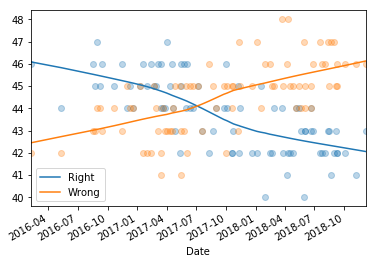

In [81]:
options = dict(marker='o', linewidth=0, alpha=0.3, label='')

df['% responding right'].plot(color='C0', **options)
df['% responding wrong'].plot(color='C1', **options)

right = make_lowess(df['% responding right'])
right.plot(label='Right')

wrong = make_lowess(df['% responding wrong'])
wrong.plot(label='Wrong')

plt.legend();